<a href="https://colab.research.google.com/github/emily-indrakusuma/KMeanswithMinMax/blob/main/Preprocessing_and_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


Preprocessing

In [18]:
df = pd.read_csv("customersegmentation.csv")
df.head()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,1500000,15,100000
1,2,750000,2,150000
2,3,15000,1,5000
3,4,225000,5,0
4,5,690000,7,8000


In [19]:
df.describe()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
count,10.00000,1.000000e+01,10.000000,10.000000
mean,5.50000,1.005267e+08,125.600000,60300.000000
std,3.02765,3.160430e+08,377.532692,69982.616889
min,1.00000,1.500000e+04,1.000000,0.000000
25%,3.25000,2.687500e+05,2.500000,5750.000000
50%,5.50000,5.950000e+05,6.000000,32500.000000
75%,7.75000,9.375000e+05,11.000000,93750.000000
max,10.00000,1.000000e+09,1200.000000,200000.000000


In [20]:
df.isna().sum()

Customer                       0
Total Amount                   0
Total Number of Transaction    0
Total Discount Amount          0
dtype: int64

In [21]:
df.head()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,1500000,15,100000
1,2,750000,2,150000
2,3,15000,1,5000
3,4,225000,5,0
4,5,690000,7,8000


In [22]:
x=df.iloc[:,[0,1,2]].values
x

array([[         1,    1500000,         15],
       [         2,     750000,          2],
       [         3,      15000,          1],
       [         4,     225000,          5],
       [         5,     690000,          7],
       [         6,     400000,          2],
       [         7,     187000,          8],
       [         8,     500000,         12],
       [         9,    1000000,          4],
       [        10, 1000000000,       1200]])

In [23]:
y = df.iloc[:,3].values
y

array([100000, 150000,   5000,      0,   8000,  25000,  40000,  75000,
       200000,      0])

In [24]:
d = preprocessing.normalize(df)
d

array([[6.65190105e-07, 9.97785158e-01, 9.97785158e-06, 6.65190105e-02],
       [2.61488180e-06, 9.80580676e-01, 2.61488180e-06, 1.96116135e-01],
       [1.89736656e-04, 9.48683279e-01, 6.32455519e-05, 3.16227760e-01],
       [1.77777778e-05, 1.00000000e+00, 2.22222222e-05, 0.00000000e+00],
       [7.24588981e-06, 9.99932794e-01, 1.01442457e-05, 1.15934237e-02],
       [1.49707887e-05, 9.98052578e-01, 4.99026289e-06, 6.23782861e-02],
       [3.66050915e-05, 9.77878874e-01, 4.18343903e-05, 2.09171952e-01],
       [1.58229816e-05, 9.88936352e-01, 2.37344725e-05, 1.48340453e-01],
       [8.82522608e-06, 9.80580676e-01, 3.92232270e-06, 1.96116135e-01],
       [1.00000000e-08, 1.00000000e+00, 1.20000000e-06, 0.00000000e+00]])

In [25]:
for i in df[['Total Amount','Total Number of Transaction','Total Discount Amount']].columns:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [26]:
df.head(10)

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,0.001485,0.011676,0.500
1,2,0.000735,0.000834,0.750
2,3,0.000000,0.000000,0.025
3,4,0.000210,0.003336,0.000
4,5,0.000675,0.005004,0.040
5,6,0.000385,0.000834,0.125
6,7,0.000172,0.005838,0.200
7,8,0.000485,0.009174,0.375
8,9,0.000985,0.002502,1.000
9,10,1.000000,1.000000,0.000


# **K-Means with 3 Centroid and 2 Iterations**

In [27]:
K = 3 

centroids = df.loc[[0,2,7],:] 

In [28]:
print(centroids)

   Customer  Total Amount  Total Number of Transaction  Total Discount Amount
0         1      0.001485                     0.011676                  0.500
2         3      0.000000                     0.000000                  0.025
7         8      0.000485                     0.009174                  0.375


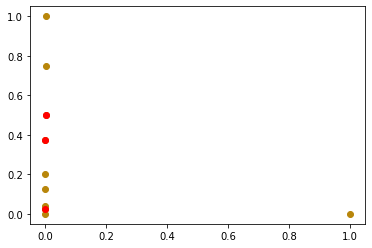

In [29]:
plt.scatter(df["Total Amount"],df["Total Discount Amount"],c='darkgoldenrod')
plt.scatter(centroids["Total Amount"],centroids["Total Discount Amount"],c='red')
plt.show()

   Customer  Cluster         1         2         3
0         1        1  0.000000  0.475146  0.125029
1         2        1  0.250236  0.725001  0.375093
2         3        2  0.475146  0.000000  0.350121
3         4        2  0.500071  0.025222  0.375046
4         5        2  0.460049  0.015827  0.335026
5         6        2  0.375158  0.100004  0.250139
6         7        3  0.300060  0.175097  0.175032
7         8        3  0.125029  0.350121  0.000000
8         9        1  0.500084  0.975004  0.625036
9        10        2  1.491246  1.414435  1.456499


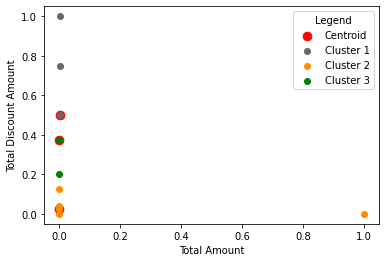

         Total Amount  Total Number of Transaction  Total Discount Amount
Cluster                                                                  
1            0.001068                     0.005004                 0.7500
2            0.200254                     0.201835                 0.0380
3            0.000329                     0.007506                 0.2875
   Customer  Cluster         1         2         3
0         1        3  0.250089  0.537693  0.212544
1         2        1  0.004183  0.766259  0.462548
2         3        3  0.725018  0.284619  0.262608
3         4        2  0.750002  0.284365  0.287530
4         5        3  0.710000  0.280318  0.247513
5         6        3  0.625014  0.296510  0.162637
6         7        3  0.550001  0.323561  0.087516
7         8        3  0.375024  0.436572  0.087516
8         9        1  0.250013  1.002440  0.712518
9        10        2  1.596991  1.130533  1.437722


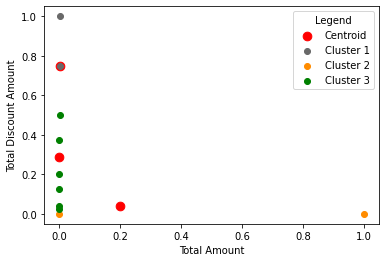

         Total Amount  Total Number of Transaction  Total Discount Amount
Cluster                                                                  
1            0.000860                     0.001668               0.875000
2            0.500105                     0.501668               0.000000
3            0.000534                     0.005421               0.210833


In [30]:
for y in range(0,2):
    XD=df
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Total Amount"]-row_d["Total Amount"])**2
            d2=(row_c["Total Number of Transaction"]-row_d["Total Number of Transaction"])**2
            d3=(row_c["Total Discount Amount"]-row_d["Total Discount Amount"])**2
            d=np.sqrt(d1+d2+d3)
            ED.append(d)
        df[i]=ED
        i=i+1
       
    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    print(df[['Customer','Cluster',1,2,3]])
    color=['dimgray','darkorange','green']
    clusters = ['Centroid','Cluster 1', 'Cluster 2', 'Cluster 3']
    plt.scatter(centroids["Total Amount"],centroids["Total Discount Amount"],c='red',s=75)
    for k in range(K):
      data=df[df["Cluster"]==k+1]
      plt.scatter(data["Total Amount"],data["Total Discount Amount"],c=color[k])
    plt.xlabel('Total Amount')
    plt.ylabel('Total Discount Amount')
    plt.legend(labels=clusters,
           title="Legend")
    plt.show()
   
    
    centroids_new = df.groupby(["Cluster"]).mean()[["Total Amount","Total Number of Transaction","Total Discount Amount"]]
    centroids = df.groupby(["Cluster"]).mean()[["Total Discount Amount","Total Number of Transaction","Total Amount"]]
     
    print (centroids_new)

In [31]:
df.head(10)

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount,1,2,3,Cluster
0,1,0.001485,0.011676,0.500,0.250089,0.537693,0.212544,3
1,2,0.000735,0.000834,0.750,0.004183,0.766259,0.462548,1
2,3,0.000000,0.000000,0.025,0.725018,0.284619,0.262608,3
3,4,0.000210,0.003336,0.000,0.750002,0.284365,0.287530,2
4,5,0.000675,0.005004,0.040,0.710000,0.280318,0.247513,3
5,6,0.000385,0.000834,0.125,0.625014,0.296510,0.162637,3
6,7,0.000172,0.005838,0.200,0.550001,0.323561,0.087516,3
7,8,0.000485,0.009174,0.375,0.375024,0.436572,0.087516,3
8,9,0.000985,0.002502,1.000,0.250013,1.002440,0.712518,1
9,10,1.000000,1.000000,0.000,1.596991,1.130533,1.437722,2


In [32]:
#Cek Accuracy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


km = KMeans(n_clusters=3, random_state=100)

km.fit_predict(df)

score = silhouette_score(df, km.labels_, metric='euclidean')

print('Score: %.5f' % score)

Score: 0.40461


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
